## Reciprocal Cooking: Recipe Generation from Food Images

In [44]:
%ls

args.py         data_loader.py  model.py  __pycache__/  train.py
build_vocab.py  demo.ipynb      modules/  sample.py     utils/


In [45]:
%cd drive/

[Errno 2] No such file or directory: 'drive/'
/content/drive/MyDrive/inversecooking-master/src


In [46]:
%ls

args.py         data_loader.py  model.py  __pycache__/  train.py
build_vocab.py  demo.ipynb      modules/  sample.py     utils/


In [47]:
cd MyDrive/

[Errno 2] No such file or directory: 'MyDrive/'
/content/drive/MyDrive/inversecooking-master/src


In [48]:
ls

args.py         data_loader.py  model.py  __pycache__/  train.py
build_vocab.py  demo.ipynb      modules/  sample.py     utils/


In [49]:
%cd inversecooking-master/

[Errno 2] No such file or directory: 'inversecooking-master/'
/content/drive/MyDrive/inversecooking-master/src


In [50]:
%ls

args.py         data_loader.py  model.py  __pycache__/  train.py
build_vocab.py  demo.ipynb      modules/  sample.py     utils/


In [51]:
%cd src/

[Errno 2] No such file or directory: 'src/'
/content/drive/MyDrive/inversecooking-master/src


In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import os
from args import get_parser
import pickle
from model import get_model
from torchvision import transforms
from utils.output_utils import prepare_output
from PIL import Image
import time

Set ```data_dir``` to the path including vocabularies and model checkpoint

In [53]:
data_dir = '../data'

In [54]:
# code will run in gpu if available and if the flag is set to True, else it will run on cpu
use_gpu = True
device = torch.device('cuda' if torch.cuda.is_available() and use_gpu else 'cpu')
map_loc = None if torch.cuda.is_available() and use_gpu else 'cpu'

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
ingrs_vocab = pickle.load(open(os.path.join('/content/drive/MyDrive/ingr_vocab.pkl'), 'rb'))
vocab = pickle.load(open(os.path.join('/content/drive/MyDrive/instr_vocab.pkl'), 'rb'))

ingr_vocab_size = len(ingrs_vocab)
instrs_vocab_size = len(vocab)
output_dim = instrs_vocab_size

In [57]:
print (instrs_vocab_size, ingr_vocab_size)

23231 1488


In [58]:
t = time.time()
import sys; sys.argv=['']; del sys
args = get_parser()
args.maxseqlen = 15
args.ingrs_only=False
model = get_model(args, ingr_vocab_size, instrs_vocab_size)
# Load the trained model parameters
model_path = os.path.join('/content/drive/MyDrive/modelbest.ckpt')
model.load_state_dict(torch.load(model_path, map_location=map_loc))
model.to(device)
model.eval()
model.ingrs_only = False
model.recipe_only = False
print ('loaded model')
print ("Elapsed time:", time.time() -t)


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


loaded model
Elapsed time: 2.7139830589294434


In [59]:
model

InverseCookingModel(
  (ingredient_encoder): EncoderLabels(
    (linear): Embedding(1488, 512, padding_idx=1487)
  )
  (recipe_decoder): DecoderTransformer(
    (embed_tokens): Embedding(23231, 512, padding_idx=23230)
    (embed_positions): LearnedPositionalEmbedding(1024, 512, padding_idx=0)
    (layers): ModuleList(
      (0): TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): Linear(in_features=512, out_features=512, bias=True)
        )
        (cond_att): MultiheadAttention(
          (out_proj): Linear(in_features=512, out_features=512, bias=True)
        )
        (fc1): Linear(in_features=512, out_features=512, bias=True)
        (fc2): Linear(in_features=512, out_features=512, bias=True)
        (layer_norms): ModuleList(
          (0): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        )
     

In [60]:
transf_list_batch = []
transf_list_batch.append(transforms.ToTensor())
transf_list_batch.append(transforms.Normalize((0.485, 0.456, 0.406), 
                                              (0.229, 0.224, 0.225)))
to_input_transf = transforms.Compose(transf_list_batch)

In [61]:
greedy = [True, False, False, False]
beam = [-1, -1, -1, -1]
temperature = 1.0
numgens = len(greedy)

Set ```use_urls = True``` to get recipes for images in ```demo_urls```. 

You can also set ```use_urls = False``` and get recipes for images in the path in ```data_dir/test_imgs```.

In [62]:
import requests
from io import BytesIO
import random
from collections import Counter
use_urls = True # set to true to load images from demo_urls instead of those in test_imgs folder
show_anyways = False #if True, it will show the recipe even if it's not valid
image_folder = os.path.join(data_dir, 'demo_imgs')

if not use_urls:
    demo_imgs = os.listdir(image_folder)
    random.shuffle(demo_imgs)

demo_urls = ['https://geekrobocook.com/wp-content/uploads/2021/01/Dahi-aloo-curry.jpg']

demo_files = demo_urls if use_urls else demo_imgs

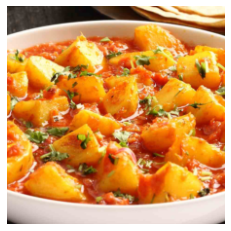

/content/drive/MyDrive/inversecooking-master/src/modules/multihead_attention.py:128: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/cuda/Indexing.cu:963.)
  float('-inf'),


RECIPE 1
greedy: True beam: -1

Title: Roasted butternut squash and sweet potato salad

Ingredients:
onion, pepper, squash, oil, potato, clove

Instructions:
-Heat oven to 425 degrees f.
-Toss squash with oil, garlic and pepper; spread onto parchment-covered rimmed baking sheet.
-Bake 40 min.
-Or until squash is tender, stirring after 20 min.
-Cool.
-Toss squash with onions and dressing.
RECIPE 2
greedy: False beam: -1

Title: Sweet potato and yellow squash stew

Ingredients:
onion, pepper, squash, oil, potato, clove

Instructions:
-Heat oil in large saucepan on medium-high heat.
-Add potatoes, onions and peppers; cook 8 min.
-Or until vegetables are crisp-tender, stirring frequently.
-Stir in garlic; cook 30 sec.
-Add squash and tomatoes; stir.
-Simmer on low 10 min., stirring occasionally.
RECIPE 3
greedy: False beam: -1

Title: Butternut squash and red pepper saute

Ingredients:
onion, pepper, squash, oil, potato, clove

Instructions:
-Heat oil in large nonstick skillet on medium-hi

In [63]:
all_predicts = []
for img_file in demo_files:
    
    if use_urls:
        response = requests.get(img_file)
        image = Image.open(BytesIO(response.content))
    else:
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path).convert('RGB')
    
    transf_list = []
    transf_list.append(transforms.Resize(256))
    transf_list.append(transforms.CenterCrop(224))
    transform = transforms.Compose(transf_list)
    
    image_transf = transform(image)
    image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)
    
    plt.imshow(image_transf)
    plt.axis('off')
    plt.show()
    plt.close()
    
    num_valid = 1
    for i in range(numgens):
        with torch.no_grad():
            outputs = model.sample(image_tensor, greedy=greedy[i], 
                                   temperature=temperature, beam=beam[i], true_ingrs=None)
            

        ingr_ids = outputs['ingr_ids'].cpu().numpy()
        recipe_ids = outputs['recipe_ids'].cpu().numpy()
            
        outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)
        all_predicts.append(outs)
        
        if valid['is_valid'] or show_anyways:
            
            print ('RECIPE', num_valid)
            num_valid+=1
            print ("greedy:", greedy[i], "beam:", beam[i])
    
            BOLD = '\033[1m'
            END = '\033[0m'
            print (BOLD + '\nTitle:' + END,outs['title'])

            print (BOLD + '\nIngredients:'+ END)
            print (', '.join(outs['ingrs']))

            print (BOLD + '\nInstructions:'+END)
            print ('-'+'\n-'.join(outs['recipe']))

            print ('='*20)

        else:
            pass
            print ("Not a valid recipe!")
            print ("Reason: ", valid['reason'])
        

Calories


In [64]:
calorydata = pd.read_csv("/content/drive/MyDrive/Food and Calories - Sheet1.csv")

In [65]:
calorydata = calorydata.rename(columns={'Serving': 'Serving (in gms)'})

In [66]:
for i in range(calorydata.shape[0]):
  calorydata["Food"][i]=calorydata["Food"][i].lower()

In [67]:
for i in range(len(all_predicts[0]["ingrs"])):
  all_predicts[0]["ingrs"][i]=all_predicts[0]["ingrs"][i].lower()

In [68]:
calorydata

,Food,Serving (in gms),Calories
0,artichoke,1 artichoke (128 g),60 cal
1,arugula,1 leaf (2 g),1 cal
2,asparagus,1 spear (12 g),2 cal
3,aubergine,1 aubergine (458 g),115 cal
4,beetroot,1 beet (82 g),35 cal
...,...,...,...
566,veggie delight,1 burger (129 g),290 cal
567,veggie patty,1 burger (218 g),700 cal
568,wendy’s baconator,1 burger (291 g),672 cal
569,wendy’s jr. bacon cheeseburger,1 sandwich (202 g),517 cal


In [69]:
for i in range(calorydata.shape[0]):
  calorydata["Serving (in gms)"][i] = calorydata["Serving (in gms)"][i].replace("(","")
  calorydata["Serving (in gms)"][i] = calorydata["Serving (in gms)"][i].replace(")","")
  numeric_val = [int(s) for s in calorydata["Serving (in gms)"][i].split() if s.isdigit()]

  calory_numeric_val = [int(s) for s in calorydata["Calories"][i].split() if s.isdigit()]

  if (len(numeric_val)==2):
    calorydata["Serving (in gms)"][i] = int(numeric_val[1])
    calorydata["Calories"][i] = (calory_numeric_val[0]/(numeric_val[1]))
    
  else:
    calorydata["Serving (in gms)"][i] = 0
    calorydata["Calories"][i] = 0

In [70]:
calorydata[243:244].values[0]

array(['wheat bran', 167, 3.5988023952095807], dtype=object)

In [71]:
calorydata=calorydata.drop(['Serving (in gms)'], axis=1)
calorydata = calorydata.rename(columns={'Calories': 'Calories (per gm)'})

In [72]:
calory_output = {}
for i in range(len(outs["ingrs"])):
  if all_predicts[0]["ingrs"][i] in calorydata["Food"].tolist():
    calory_output[all_predicts[0]["ingrs"][i]] = calorydata["Calories (per gm)"][calorydata["Food"].tolist().index(all_predicts[0]["ingrs"][i]):calorydata["Food"].tolist().index(all_predicts[0]["ingrs"][i])+1].values[0]
    # print(all_predicts[0]["ingrs"][i],calorydata["Food"].tolist().index(all_predicts[0]["ingrs"][i]))


    # calorydata["Food"].tolist().index(all_predicts[0]["ingrs"][i])

calory_output

{'clove': 4.0,
 'oil': 9.0,
 'onion': 0.4,
 'pepper': 0.26666666666666666,
 'potato': 0.7699530516431925,
 'squash': 0.4489795918367347}

In [73]:
calory_output

{'clove': 4.0,
 'oil': 9.0,
 'onion': 0.4,
 'pepper': 0.26666666666666666,
 'potato': 0.7699530516431925,
 'squash': 0.4489795918367347}

In [74]:
BOLD = '\033[1m'
END = '\033[0m'

for i in calory_output:
  print(BOLD+"{item} -".format(item = i.capitalize())+END,str(round(calory_output[i], 2))+"cals")

print(BOLD+"Total Calories in 1gm of {title} is".format(title=all_predicts[0]["title"]),round(sum(calory_output.values()),2))


Onion - 0.4cals
Pepper - 0.27cals
Squash - 0.45cals
Oil - 9.0cals
Potato - 0.77cals
Clove - 4.0cals
Total Calories in 1gm of Roasted butternut squash and sweet potato salad is 14.89
